<a href="https://colab.research.google.com/github/ChristianGoueguel/Cellwise-Outliers-Detection-in-Optical-Emission-Spectroscopy/blob/master/Pulse_Energy_Measurement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pulse Energy Measurement**

## **1. Polarization (Beamsplitter)**

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
%load_ext rpy2.ipython

In [30]:
%%R
library(tidyverse)
library(magrittr)

In [ ]:
%%R
install.packages("patchwork")
library(patchwork)

In [ ]:
%%R
plot1 <- df %>%
  group_by(type) %>%
  ggplot(aes(m, mean)) +
  geom_point(aes(colour = type), size = 3) +
  geom_line(aes(colour = type)) +
  labs(x= "Measurement", y = "Laser energy (uJ/pulse)", colour = "Polarization") +
  theme_bw() +
  theme(legend.position="top")

plot2 <-
  tibble(
    a = df %>% filter(type %in% "P") %>% pull(mean),
    b = df %>% filter(type %in% "S") %>% pull(mean)
  ) %>%
  ggplot(aes(a, b)) +
  geom_point() +
  geom_line() +
  labs(x = "S_polarized energy (uJ/pulse)", y = "P_polarized energy (uJ/pulse)") +
  theme_bw()

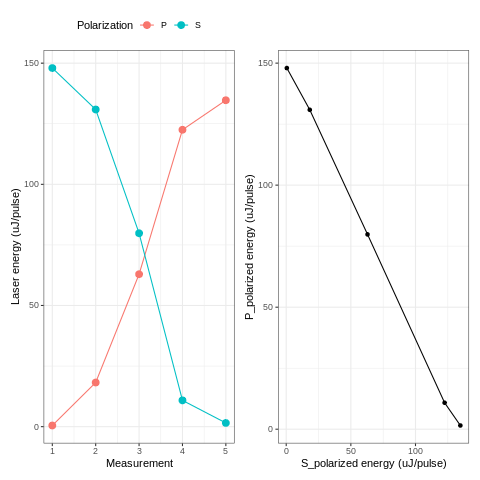

In [ ]:
%%R
plot1 | plot2

In [ ]:
%%R
tibble(
    a = df %>% filter(type %in% "P") %>% pull(mean), 
    b = df %>% filter(type %in% "S") %>% pull(mean)
  ) %>%
  lm(a ~ b, .) %>%
  broom::tidy()

# A tibble: 2 × 5
  term        estimate std.error statistic    p.value
  <chr>          <dbl>     <dbl>     <dbl>      <dbl>
1 (Intercept)  134.       1.32       102.  0.00000208
2 b             -0.897    0.0138     -64.9 0.00000805


$
P_{energy} = 134 - 0.897\cdot S_{energy}  
$

## **2. Repetition Rates**

Rows: 50000 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (18): e_10Hz, e_50Hz, e_100Hz, e_300Hz, e_500Hz, e_700Hz, e_1000Hz, e_20...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


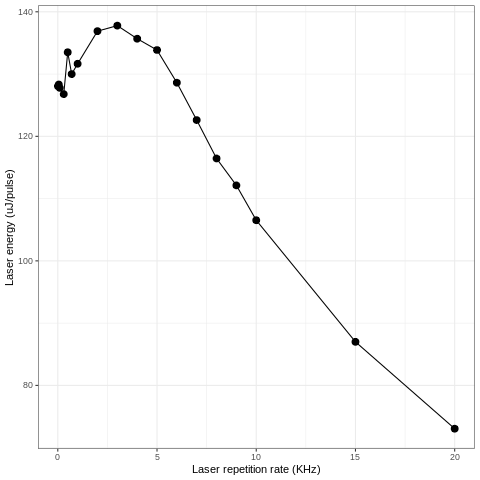

In [ ]:
%%R
read_csv("repRates.csv") %>% 
  as_tibble() %>%
  mutate(timestamp = 1:50e3) %>%
  relocate(timestamp, .before = e_10Hz) %>%
  pivot_longer(!timestamp, names_to = "rep_rate", values_to = "energy") %>%
  group_by(rep_rate) %>%
  summarise(mean_energy = mean(energy, na.rm = TRUE)*1e6) %>%
  ungroup() %>%
  mutate(rep_rate = str_remove(.$rep_rate, "e_")) %>%
  mutate(rep_rate = str_remove(.$rep_rate, "Hz")) %>%
  modify_at("rep_rate", as.numeric) %>%
  arrange(desc(rep_rate)) %>%
  ggplot(aes(x = rep_rate*1e-3, y = mean_energy)) +
  geom_point(size = 3) +
  geom_line() +
  labs(x = "Laser repetition rate (KHz)", y = "Laser energy (uJ/pulse)") +
  theme_bw()